# 1. 필요 모듈 불러오기 및 모델 이미지 잘라내기

[(92, 151, 199, 44)]


(92, 151, 199, 44)

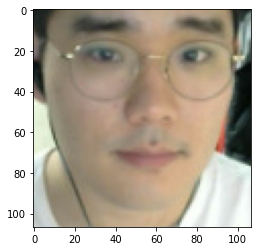

In [296]:
import face_recognition
import os
import numpy as np
import pandas as pd

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/나0.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.


face_locations[0]

# 2. 얼굴 이미지 잘라내기 함수

In [297]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

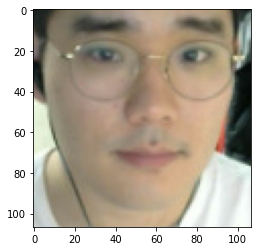

In [298]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/나0.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

# 3. 파일 리스트 확인

In [299]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images/'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['김고은.jpeg', '심수창.jpeg', '아린.jpg', 'clinton.jpeg', '이종석.jpg', '박보영.jpg', '리사.jpg', '첸.jpg', '장동건.jpeg', '존 파브르.jpeg', '리아.jpg', '이근대위.jpeg', '지코.jpg', '강동원.jpg', '오재원.jpg', '조승우.jpeg', '노홍철.jpeg', '류현진.jpg', '잭 스페이더.jpeg', '이희준.jpg', '제프리 힌턴.jpg', '차명석.jpg', '신동엽.jpg', '황정민.jpg', '조인성.jpg', '잇지예지.jpeg', '전소미.jpg', '윤도현.png', '이안 굿펠로우.jpg', '길.jpg', '공유.jpg', '강민경.jpg', '이천수.jpg', '이용진.jpg', '안재홍.jpg', '케이.jpg', '류진.jpg', '씨잼.jpg', '황병국.jpg', '로저 무어.jpeg', '티모시 달튼.jpeg', '주진모(올드).jpg', '하정우.jpg', '아이즈원조유리.jpeg', '장원준.jpeg', '유노윤호.jpg', '무라니시.png', '이정재.jpeg', 'b1a4진영.jpg', '레인보우재경.jpg', '이효리.jpg', '개리.jpg', '드웨인 존슨.jpg', '벤 에플렉.jpeg', '사쿠라.jpg', '김학범.jpg', '제이홉.jpg', '공효진.jpg', '트와이스모모.jpeg', 'trump.jpg', '박서준.jpeg', '로다주.jpeg', '장도연.jpg', '유재석.jpg', '이명박.jpg', '지드래곤.jpeg', '강미나.jpg', '김유정.jpg', '매드클라운.jpeg', '유희열.jpeg', '저스틴 존슨.jpeg', '태양.jpeg', '마크 러팔로.jpeg', '백현.jpg', '제이콥 배털론.jpg', '태연.jpg', '러블리즈지수.jpeg', '배성재.jpg', '박휘순.jpg', '트와이스정연.jpg', '하승진.jpg', '윤경신.jpg', '정형돈.jpg

# 4. 얼굴 영역 임베딩 벡터 구하기

In [300]:
image_file = os.path.join(dir_path, '나0.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)


def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.00641455,  0.12942433,  0.06325618, -0.03982778, -0.0355861 ,
        -0.02251137, -0.1546091 , -0.1032785 ,  0.13536967, -0.10408054,
         0.24170008, -0.0279095 , -0.18698487, -0.09400246, -0.06300101,
         0.19306579, -0.18968263, -0.16132843, -0.00165622, -0.02344189,
         0.0994482 ,  0.06346367, -0.0167289 ,  0.03891083, -0.18171626,
        -0.31465527, -0.12702304, -0.09363374, -0.084728  , -0.11497764,
        -0.07917655,  0.05590956, -0.15388383, -0.00885873,  0.05562931,
         0.08348118, -0.02814078, -0.06432845,  0.18879652,  0.08402317,
        -0.17176154,  0.06084747,  0.0548889 ,  0.25212899,  0.23973659,
         0.00880096,  0.03010576, -0.14314403,  0.12127965, -0.13329959,
         0.08891843,  0.18603143,  0.08106627,  0.16388543, -0.01391789,
        -0.11937714, -0.01442556,  0.13263972, -0.10487925,  0.01780908,
         0.04898875, -0.1008137 , -0.06050092, -0.02710179,  0.19173616,
         0.10630938, -0.13618706, -0.19218241,  0.1

# 5. 임베딩 딕셔너리화

In [301]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file) #경로를 병합하여 반환해주는 함수. 
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [302]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['나0']

array([-0.00641455,  0.12942433,  0.06325618, -0.03982778, -0.0355861 ,
       -0.02251137, -0.1546091 , -0.1032785 ,  0.13536967, -0.10408054,
        0.24170008, -0.0279095 , -0.18698487, -0.09400246, -0.06300101,
        0.19306579, -0.18968263, -0.16132843, -0.00165622, -0.02344189,
        0.0994482 ,  0.06346367, -0.0167289 ,  0.03891083, -0.18171626,
       -0.31465527, -0.12702304, -0.09363374, -0.084728  , -0.11497764,
       -0.07917655,  0.05590956, -0.15388383, -0.00885873,  0.05562931,
        0.08348118, -0.02814078, -0.06432845,  0.18879652,  0.08402317,
       -0.17176154,  0.06084747,  0.0548889 ,  0.25212899,  0.23973659,
        0.00880096,  0.03010576, -0.14314403,  0.12127965, -0.13329959,
        0.08891843,  0.18603143,  0.08106627,  0.16388543, -0.01391789,
       -0.11937714, -0.01442556,  0.13263972, -0.10487925,  0.01780908,
        0.04898875, -0.1008137 , -0.06050092, -0.02710179,  0.19173616,
        0.10630938, -0.13618706, -0.19218241,  0.10416703, -0.11

In [303]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('나0', '박나래')

0.6417292109496637

In [304]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('나0')   

# 6. 닮은꼴 연예인 찾기: 이름 출력

In [305]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
                                   
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [306]:
get_nearest_face('나0')

순위 1 : 이름(이종석), 거리(0.44213861023186557)
순위 2 : 이름(권현빈), 거리(0.4562078601072825)
순위 3 : 이름(첸), 거리(0.48019675979602905)
순위 4 : 이름(김연우), 거리(0.4840458390493511)
순위 5 : 이름(b1a4진영), 거리(0.4845861595749491)


## ↪Vector distance 0.5미만의 닮은 꼴 연예인들의 목록이 성공적으로 출력되었다. (1순위가 나와 이름마저 같다.)

# 7. 시각화 해보기

In [307]:
def get_nearest_name(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    name = []
    name_dict = {}
    LABEL = [1, 2, 3, 4, 5, 6]

    for i in range(top+1):

        if sorted_faces[i]:

            name.append(sorted_faces[i][0])
    for i in range(len(name)):
        name_dict[name[i]] = LABEL[i]
        
    return name_dict

In [308]:
name_dict = get_nearest_name('나0')

## ↪우선, 나와 닮은꼴 연예인의 이름과 키값을 생성하는 함수를 만들었다.
## ↪나의 얼굴을 첫 창에 띄우기 위해 1번키에 포함시켰다.

In [309]:
def visualize_celebs(name):
    print(str(name)+"님과 닮은 연예인은?")
    cols = 3
    rows = 2
    fig = plt.figure()
    axes = []
    name_dict = get_nearest_name(name)
    
    for key, value in name_dict.items():
        image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/' + key + '.jpg'
        cropped_face = get_gropped_face(image_path)
        axes.append( fig.add_subplot(rows, cols, value) )
        subplot_title=str(value) +str(key)
        axes[-1].set_title(subplot_title)  
        plt.imshow(cropped_face)
        
    fig.tight_layout()  
      
    return plt.show()
        

## ↪matplotlib모듈의 add.sub_plot함수를 활용해 나의 얼굴부터 5순위까지 나열하는 함수를 생성했다.

# 8. 최종 결과

나0님과 닮은 연예인은?


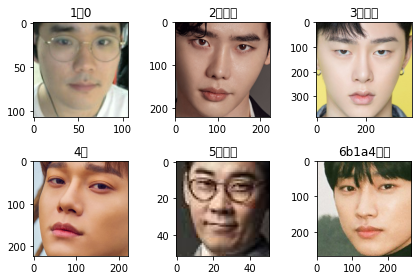

In [310]:
visualize_celebs('나0')

## ↪성공적으로 출력이 된 모습이다.

---

# 회고

## 1. 친구들과 재미삼아 해보던 닮은 꼴 연예인 찾기가 어떠한 방식으로 동작하는지 알 수 있었다.

## 2. 닮은꼴 이름 목록을 뽑는데까지는 어렵지 않게 진행했었는데, 시각화에서 애를 많이 먹었다.

## 3. 내가 원하던 그림은 최종 결과물 처럼 내 얼굴을 포함한 6장의 사진이 2x3 행렬로 나열이 되는것이였는데 for문을 사용하면 5순위 사진 (b1a4 진영) 사진만 딸랑 나오곤 했다.

## 4. 결국 구글링을 통해 matplotlib의 add_subplot함수를 이용하면 여러장의 사진을 게시 할 수 있다는 사실을 알았고 이를 활용하여 원하던 그림을 출력 할 수 있었다.

## 5. 노드를 진행하며 의외로 알게된 사실은 이러한 앱엔 머신러닝이 필수적으로 필요할줄 알았는데, 이미지간 벡터 거리차를 통하여 닮은꼴 연예인을 찾아낼수 있다는 것이 신기했다.

## 6. 이번 노드를 통하여 잘 감이 안잡혔던 이미지 벡터에 대한 지식을 복습해가며 더 깊이 알게 된것같다.